___
# Ciência dos Dados - PROJETO 1

## Diego David

## Análise de obtenção de Internet no Brasil

___
## Introdução

Este projeto foi feito com a intenção de analisar como o tamanho da familia influencia na obtenção de Internet. Algumas variaveis, como se o domicilio tem 3G, tem Banda Larga, a Renda e, o numero de integrantes da familia. Esta ultima variavel, foi dividida de forma que uma familia de no máximo 2 pessoas seja de pequeno porte, uma familia de 3 a 5 pessoas seja de médio porte e uma familia com mais de 5 integrantes seja de grande porte


# Pergunta

Como o tamanho e a renda influenciam na obtenção de Internet por familias de todo o Brasil?

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/adesktop/Documents/ C. Dados


In [3]:
#Se usar o arquivo descompactado
dados2015=pd.read_csv('DOM2015.csv',sep=',')
dados2014=pd.read_csv('DOM2014.csv',sep=',')
dados2013=pd.read_csv('DOM2013.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
#restrinção de colunas para os três anos, além de uma renda máxima de 500000 reais
dados2015=dados2015.loc[dados2015.V4614<500000,['V0105','V02426','V02424','V4614']]

dados2014=dados2014.loc[dados2014.V4614<500000,['V0105','V02426','V02424','V4614']]

dados2013=dados2013.loc[dados2013.V4614<500000,['V0105','V02426','V02424','V4614']]


In [5]:
#Definindo famílias/renda

#2015
dados2015.loc[(dados2015.V0105>=3) & (dados2015.V0105<=5),"Familia"]="Média"
dados2015.loc[(dados2015.V0105>=1) & (dados2015.V0105<=2),"Familia"]="Pequena"
dados2015.loc[(dados2015.V0105>=6),"Familia"]="Grande"



#2014
dados2014.loc[(dados2014.V0105>=3) & (dados2014.V0105<=5),"Familia"]="Média"
dados2014.loc[(dados2014.V0105>=1) & (dados2014.V0105<=2),"Familia"]="Pequena"
dados2014.loc[(dados2014.V0105>=6),"Familia"]="Grande"



#2013
dados2013.loc[(dados2013.V0105>=3) & (dados2013.V0105<=5),"Familia"]="Média"
dados2013.loc[(dados2013.V0105>=1) & (dados2013.V0105<=2),"Familia"]="Pequena"
dados2013.loc[(dados2013.V0105>=6),"Familia"]="Grande"

In [6]:
#

#2015
dados2015.V02426 = dados2015.V02426.astype("category")
dados2015.V02424 = dados2015.V02424.astype("category")

dados2015.V02426.cat.categories = ("Sim","Nao")
dados2015.V02424.cat.categories = ("Sim","Não")

dados2015 = dados2015.rename(columns={"V02426": "Tem_Banda","V02424":"Tem_3G",'V4614':'Renda'})

dados2015 = dados2015[pd.notnull(dados2015["Familia"])]
dados2015 = dados2015[pd.notnull(dados2015["Tem_Banda"])]
dados2015 = dados2015[pd.notnull(dados2015["Tem_3G"])]

dados2015=dados2015.loc[:,['Tem_Banda','Tem_3G','Familia','Renda']] #define colunas

dados15_P=dados2015[dados2015.Renda<5000]

dados15_R=dados2015[dados2015.Renda>=5000]



#2014
dados2014.V02426 = dados2014.V02426.astype("category")
dados2014.V02424 = dados2014.V02424.astype("category")

dados2014.V02426.cat.categories = ("Sim","Nao")
dados2014.V02424.cat.categories = ("Sim","Não")

dados2014 = dados2014.rename(columns={"V02426": "Tem_Banda","V02424":"Tem_3G",'V4614':'Renda'})

dados2014 = dados2014[pd.notnull(dados2014["Familia"])]
dados2014 = dados2014[pd.notnull(dados2014["Tem_Banda"])]
dados2014 = dados2014[pd.notnull(dados2014["Tem_3G"])]

dados2014=dados2014.loc[:,['Tem_Banda','Tem_3G','Familia','Renda']] #define colunas

dados14_P=dados2014[dados2014.Renda<5000]

dados14_R=dados2014[dados2014.Renda>=5000]


#2013
dados2013.V02426 = dados2013.V02426.astype("category")
dados2013.V02424 = dados2013.V02424.astype("category")

dados2013.V02426.cat.categories = ("Sim","Nao")
dados2013.V02424.cat.categories = ("Sim","Não")

dados2013 = dados2013.rename(columns={"V02426": "Tem_Banda","V02424":"Tem_3G",'V4614':'Renda'})

dados2013 = dados2013[pd.notnull(dados2013["Familia"])]
dados2013 = dados2013[pd.notnull(dados2013["Tem_Banda"])]
dados2013 = dados2013[pd.notnull(dados2013["Tem_3G"])]

dados2013=dados2013.loc[:,['Tem_Banda','Tem_3G','Familia','Renda']] #define colunas

dados13_P=dados2013[dados2013.Renda<5000]

dados13_R=dados2013[dados2013.Renda>=5000]


In [7]:
ct2 = pd.crosstab(dados2015.Familia, dados2015.Tem_Banda)
ct2

Tem_Banda,Sim,Nao
Familia,,
Grande,2202,1575
Média,29319,12455
Pequena,14457,6324


In [8]:
ct3 = pd.crosstab(dados2014.Familia, dados2014.Tem_Banda)
ct3


Tem_Banda,Sim,Nao
Familia,,
Grande,2039,1705
Média,27674,11985
Pequena,13617,5512


In [9]:
ct5 = pd.crosstab(dados2013.Familia, dados2013.Tem_Banda)
ct5

Tem_Banda,Sim,Nao
Familia,,
Grande,1899,1227
Média,24885,8368
Pequena,11567,3717


In [10]:
ct3 = pd.crosstab(dados2015.Familia, dados2015.Tem_3G)
ct3

Tem_3G,Sim,Não
Familia,,
Grande,2867,910
Média,29623,12151
Pequena,14579,6202


In [11]:
ct3 = pd.crosstab(dados2014.Familia, dados2014.Tem_3G)
ct3

Tem_3G,Sim,Não
Familia,,
Grande,2740,1004
Média,25973,13686
Pequena,12037,7092


In [12]:
ct3 = pd.crosstab(dados2013.Familia, dados2013.Tem_3G)
ct3

Tem_3G,Sim,Não
Familia,,
Grande,1779,1347
Média,15182,18071
Pequena,6960,8324


## Análise Qualitativa

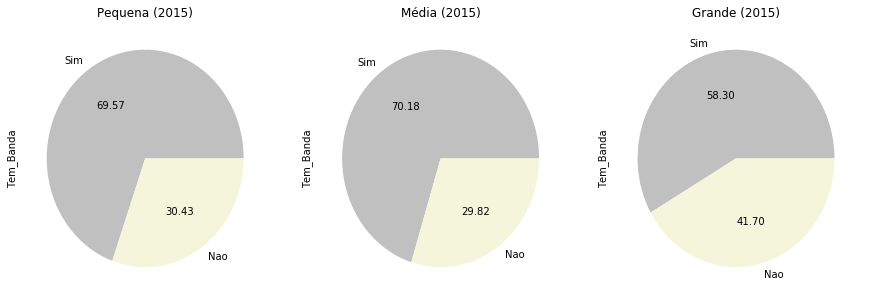

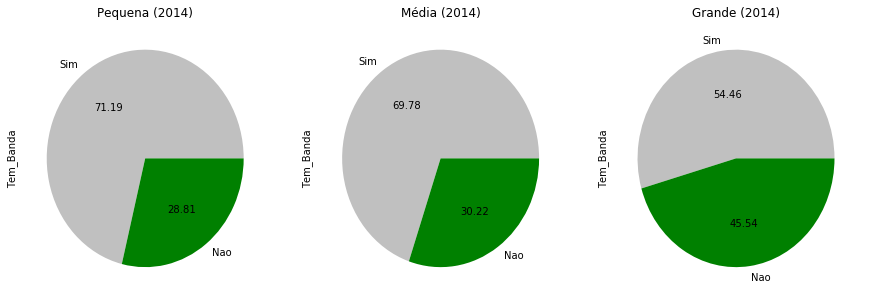

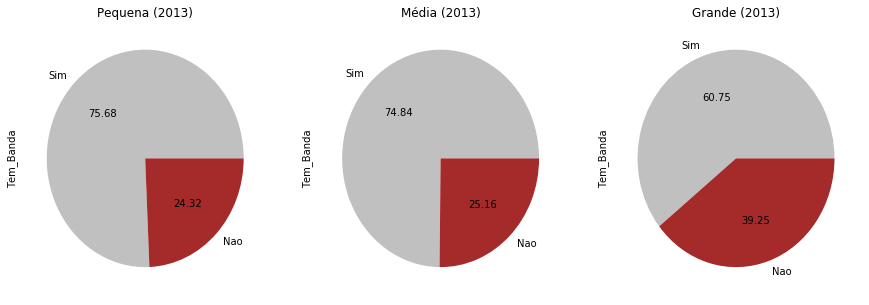

In [13]:
#2015
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2015.Tem_Banda[dados2015.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Pequena (2015)')

plt.subplot(132)
adim = dados2015.Tem_Banda[dados2015.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Média (2015)')

plt.subplot(133)
adim = dados2015.Tem_Banda[dados2015.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Grande (2015)')
plt.show()

#2014
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2014.Tem_Banda[dados2014.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Pequena (2014)')

plt.subplot(132)
adim = dados2014.Tem_Banda[dados2014.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Média (2014)')

plt.subplot(133)
adim = dados2014.Tem_Banda[dados2014.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Grande (2014)')
plt.show()


#2013
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2013.Tem_Banda[dados2013.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Pequena (2013)')

plt.subplot(132)
adim = dados2013.Tem_Banda[dados2013.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Média (2013)')

plt.subplot(133)
adim = dados2013.Tem_Banda[dados2013.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Grande (2013)')
plt.show()

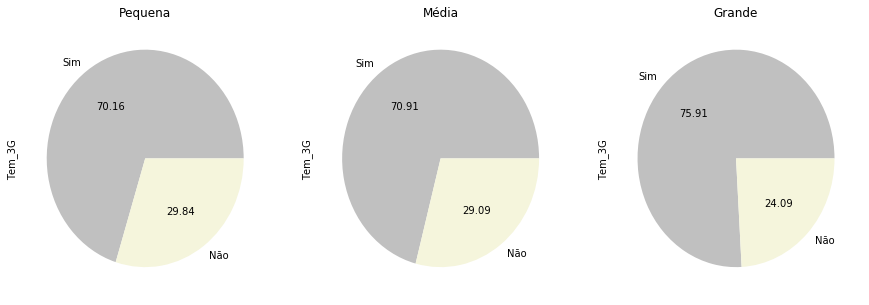

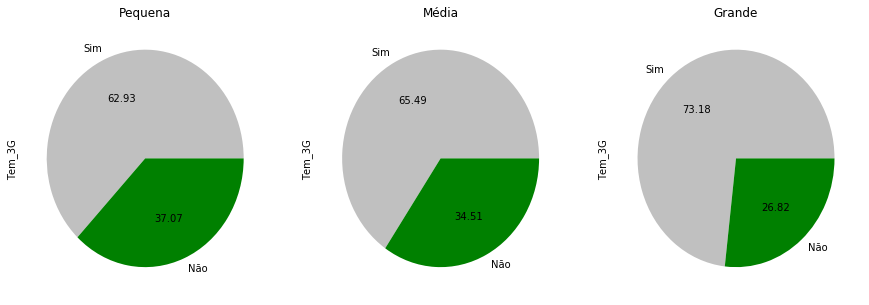

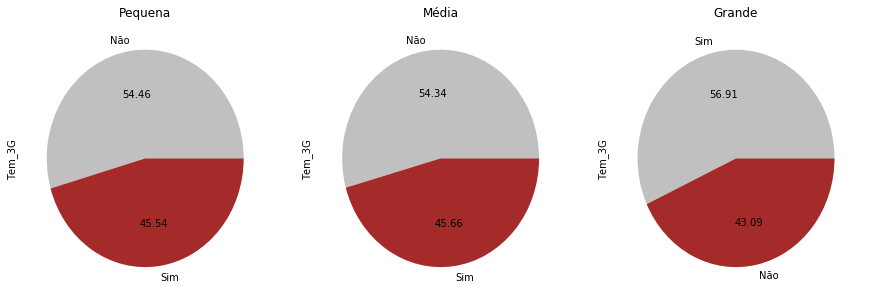

In [14]:
#2015
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2015.Tem_3G[dados2015.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Pequena')

plt.subplot(132)
adim = dados2015.Tem_3G[dados2015.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Média')

plt.subplot(133)
adim = dados2015.Tem_3G[dados2015.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Beige"])
plt.title('Grande')
plt.show()

#2014
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2014.Tem_3G[dados2014.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Pequena')

plt.subplot(132)
adim = dados2014.Tem_3G[dados2014.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Média')

plt.subplot(133)
adim = dados2014.Tem_3G[dados2014.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Green"])
plt.title('Grande')
plt.show()

#2013
fig= plt.figure(figsize=(15,5))
plt.subplot(131)
adim = dados2013.Tem_3G[dados2013.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Pequena')

plt.subplot(132)
adim = dados2013.Tem_3G[dados2013.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Média')

plt.subplot(133)
adim = dados2013.Tem_3G[dados2013.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False,colors=["Silver","Brown"])
plt.title('Grande')
plt.show()

## Observação

   Ao analisar os gráficos acima, que mostram a porcentagem de familias dos diferentes portes com Banda Larga e 3G ao longo dos 3 anos, percebe-se que a porcentagem de familias de todos os portes com 3G ao longo dos anos aumentou. Isso infere que a utilização de 3G para o acesso a Internet se popularizou. Além disso, com relação a Banda Larga, a porcentagem de familias de medio e grande porte que utilizam esse meio decaiu no ano de 2014, voltando a crescer em 2015, enquanto as familias de pequeno porte tiverem um declinio nos 3 anos. Isso pode demonstrar que as pessoas estão preferindo outros meios ao invés de Banda Larga.


/Users/adesktop/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


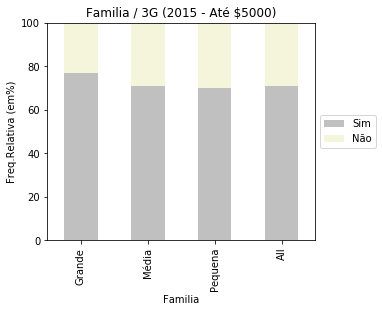

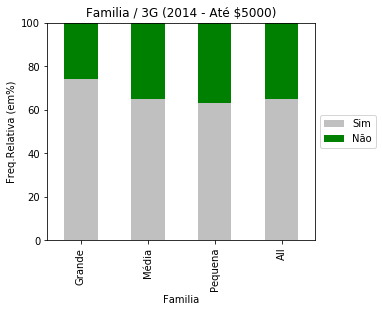

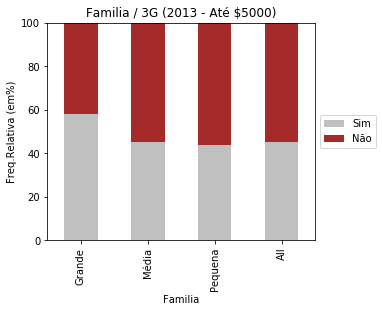

In [15]:
#Renda < 5000
#3G


def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

##2015

ct4 = pd.crosstab(dados15_P.Familia, dados15_P.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2015 - Até $5000)',colors=["Silver","Beige"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



##2014

ct4 = pd.crosstab(dados14_P.Familia, dados14_P.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2014 - Até $5000)',colors=["Silver","Green"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


##2013


ct4 = pd.crosstab(dados13_P.Familia, dados13_P.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2013 - Até $5000)',colors=["Silver","Brown"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



/Users/adesktop/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


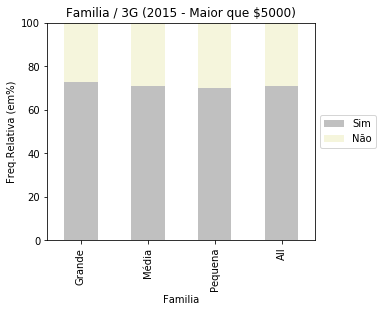

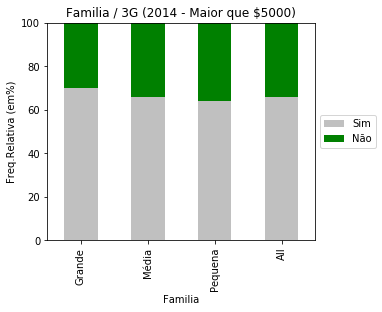

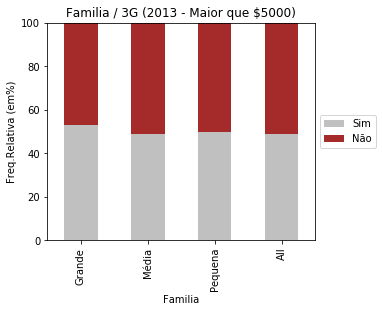

In [16]:
#Renda > 5000
#3G

##2015

ct4 = pd.crosstab(dados15_R.Familia, dados15_R.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2015 - Maior que $5000)',colors=["Silver","Beige"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



##2014

ct4 = pd.crosstab(dados14_R.Familia, dados14_R.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2014 - Maior que $5000)',colors=["Silver","Green"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


##2013


ct4 = pd.crosstab(dados13_R.Familia, dados13_R.Tem_3G, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / 3G (2013 - Maior que $5000)',colors=["Silver","Brown"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Observação

Os gráficos acima foram produzidos separando a Renda em duas, de mais de 5000 reais e de menos. O objetivo era observar se havia uma discrepância entre as familias de maior renda e de menor, porém isso não foi observado, visto que nos dois tipos houve um considerável aumento na utilização do 3G depois do ano de 2013.

/Users/adesktop/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


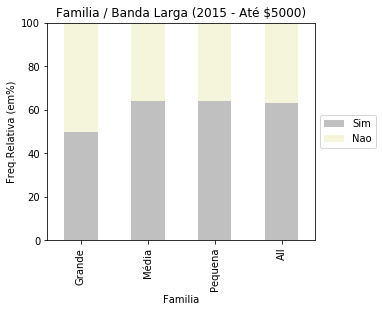

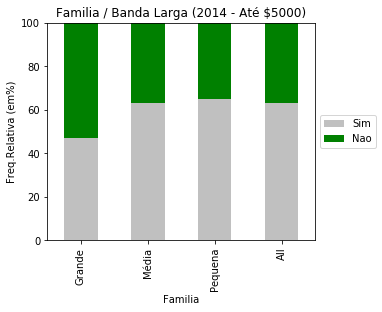

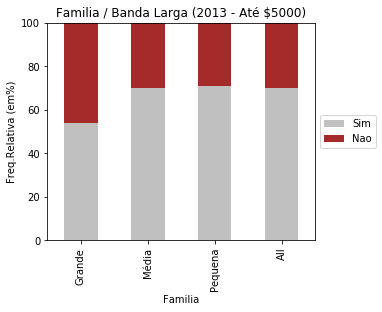

In [17]:
#Renda < 5000
#Banda Larga

#2015
ct4 = pd.crosstab(dados15_P.Familia, dados15_P.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2015 - Até $5000)',colors=["Silver","Beige"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#2014
ct4 = pd.crosstab(dados14_P.Familia, dados14_P.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2014 - Até $5000)',colors=["Silver","Green"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#2013
ct4 = pd.crosstab(dados13_P.Familia, dados13_P.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_3G']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2013 - Até $5000)',colors=["Silver","Brown"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


/Users/adesktop/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


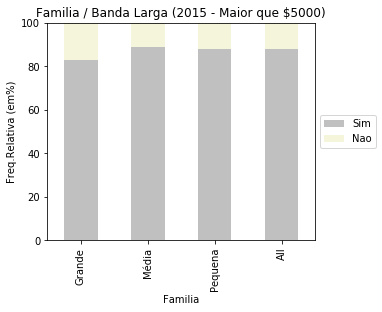

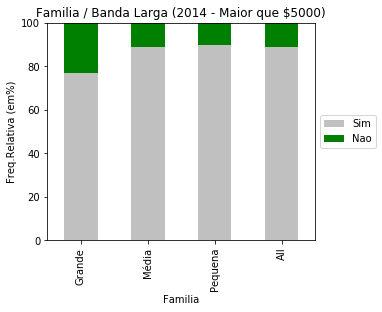

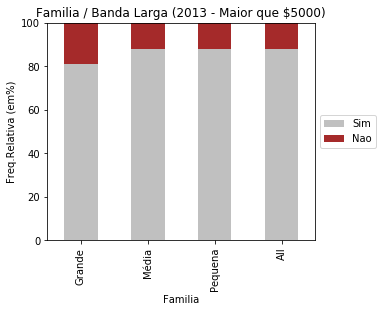

In [18]:
#Renda > 5000
#Banda Larga

#2015
ct4 = pd.crosstab(dados15_R.Familia, dados15_R.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_Banda']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2015 - Maior que $5000)',colors=["Silver","Beige"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#2014
ct4 = pd.crosstab(dados14_R.Familia, dados14_R.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_Banda']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2014 - Maior que $5000)',colors=["Silver","Green"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#2013
ct4 = pd.crosstab(dados13_R.Familia, dados13_R.Tem_Banda, margins=True, rownames=['Familia'], colnames=['Tem_Banda']).apply(percConvert, axis=1)

ct4 = ct4.iloc[:,0:2]
plot = ct4.plot(kind='bar', stacked=True,title='Familia / Banda Larga (2013 - Maior que $5000)',colors=["Silver","Brown"])
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Observação 

Com os gráficos acima de Banda Larga com rendas definidas de maior que 5000 reais e menor que 5000 reais, foi possível observar que enquanto as familias mais ricas não tiveram muita variação na porcentagem de pessoas que tem Banda Larga, as familias de faixa de renda inferior tiveram uma variação ligeiramente mais alta, sendo que a porcentagem destas sofreu um declínio.

## Análise Quantitativa 

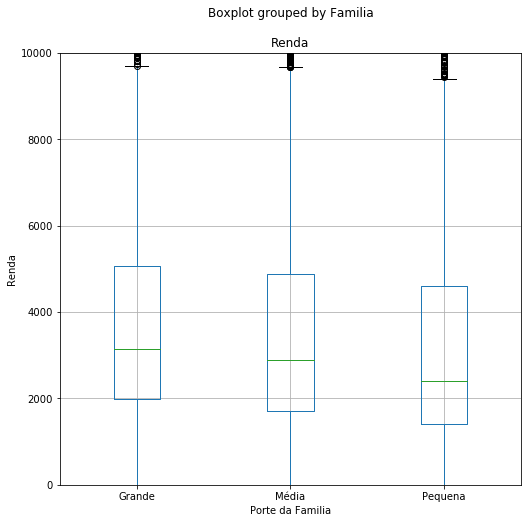

In [19]:
plot = dados2015.boxplot('Renda',by='Familia', figsize=(8,8))
plt.ylabel('Renda')
plt.xlabel('Porte da Familia')
plt.ylim(0,10000)
plt.show()

## Observação 

Com o boxplot acima percebe-se que as familias de grande porte tem uma renda ligeiramente maior que as outras, porém essas familias provavelmente tem mais gastos, o que pode prejudicar na obtenção de Internet. Isso deixa o poder de compra das familias de portes diferentes mais equilibrado e favorece a análise.

___
# Conclusão 

Ao analisar os gráficos, percebe-se que o número entre as familias de grande porte (mais de 6 pessoas) que tem 3G é maior que o número de familias de grande porte que não tem 3G, enquanto este porte é o que tem  menos tem Banda Larga percentualmente. Com relação as outras duas, de pequeno porte(até duas pessoas) e de médio porte(de 3 a 5 pessoas), elas se mantém similares em todos os índices analisados.

Além disso, foi notado que a renda influenciou pouco na utilização do 3G, porém teve influencia sobre a Banda Larga. Esta influencia ocorreu somente nas familias de menor renda, já que menos familias deste porte tinham este tipo de Internet no ano de 2015,em relação a 2013.

Dessa forma, é possível dizer que as familias de grande porte tem uma maior tendencia a ter Internet por 3G, ao mesmo tempo que as outras tem maior tendência a ter Internet por Banda Larga. Também é possível afirmar que a renda influencia na obtenção de Banda Larga, sendo as familias de maior classe as que mais tem Banda Larga. Este ultimo fato condiz com a ideia primária de que as pessoas de maior renda tem mais condições de arcar com uma Internet de alta velocidade. Apesar disso, a descoberta de que as familias de grande porte tem uma maior tendencia a ter Internet por 3G foi uma surpresa, visto que aparentemente não há nenhuma relação entre a familia ser grande e ter 3G.